# Tutorial 03 in class exercises (randomization and bootstrapping)
## Goals
* Practice working through coding basics on your own
* Get a better intuition about when standard parametric t-tests and non-parametric approaches produce similar results and when they can diverge
* See the importance of plotting your data before you do anything else!
* Apply bootstrapping to some real EEG data to estimate confidence intervals

## First start by importing the packages you'll need. 
* Numpy, scipy, and matplotlib
* maybe set up a standard font as well if you want to get fancy

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## Part I: Start with some data.
* First plot it
* Then compute summary stats (mean, std) for each data array
* Then compute the correlation coeffecient that relates the two arrays
* Then the t-value and p-value associated with the correlation. 
* Try to do this without copying from the in-class tutorial! Google the formulas if you don't remember them and then try to translate them into python (you can peek at in class tutorial if you get stuck, but its good practice to just hack it out)

[source of this famous data set: Anscombe](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)

In [2]:
d1 = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
d2 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])

## Plot data...scatter works well here
* First rule of data analysis...always plot your data first!

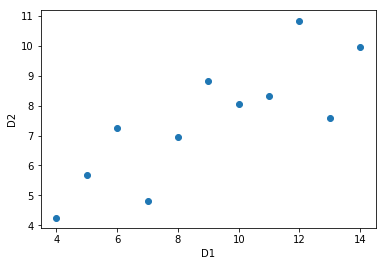

In [7]:
plt.scatter(d1,d2)
plt.xlabel('D1')
plt.ylabel('D2')
plt.show()

## Compute mean, std of both data arrays
* Leave the output in the notebook so that we can come back and compare later

In [12]:
d1_mean = d1.mean()
d1_std = d1.std()
d2_mean = d2.mean()
d2_std = d2.std()

print('Mean of dataset 1 = ', d1_mean, '\nStandard Deviation of dataset 1 = ', d1_std)
print('Mean of dataset 2 = ', d2_mean, '\nStandard Deviation of dataset 2 = ', d2_std)

Mean of dataset 1 =  9.0 
Standard Deviation of dataset 1 =  3.1622776601683795
Mean of dataset 2 =  7.500909090909093 
Standard Deviation of dataset 2 =  1.937024215108669


## Correlate the two data arrays, compute t-value and p-value associated with correlation coef

In [19]:
correlation = np.corrcoef(d1,d2)[0,1]
print('Correlation Coefficient = ', correlation)
ttest = stats.ttest_rel(d1,d2)
print('t-value = ', ttest[0], '\np-value = ', ttest[1])

Correlation Coefficient =  0.81642051634484
t-value =  2.4479253606701743 
p-value =  0.03437961497003717


## Now use randomization testing to eval the reliability of the estimated p-value. 

<div class="alert alert-info">
Before you run this procedure, you should have a pretty good idea about how the standard p-value will compare with the p-value that you estimate using randomization. Make a prediction!
</div>

In [ ]:
N = 100 #number of randomizations

## Part II: Here is a second data set (actually, its another part of the Anscombe data set...but lets pretend like its an entirely new data set)

In [ ]:
d1 = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
d2 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89])

## Break the first rule of data analysis, and BEFORE you plot the data, compute the mean and std of these two arrays
* What do you notice when you compare them to the mean and std of the arrays in the first part of the exercises?

## Based only on your comparison of the mean and std of the data from Part I and Part II, what is your prediction about the effects of randomization testing on this new data set? 
* Will the randomization based p-value be similar to the standard p-value as it was in the example above?

## Ok - now plot the data

## Based on this, what do you think is going to happen when we compare the output from a parametric test and a radomization test?
* Remember that the mean and the std of the data sets in Part I and Part II are identical...
* Compute correlation coef, and do randomization testing

## Compare the correlation coeffecients to those from Part I.
* So far, everything is pretty much the same between the data sets (same mean/std/corr coef)
* So should randomization testing yield about the same results? Try it...

## Part III: Load in the second EEG data set from last week (eeg_data01.npz). 
* Pull out the data, sr, and tx arrays

In [ ]:
# load the data...
eeg = np.load('eeg_data01.npz')

## Below is a vector that labels each trial as coming from experimental conditions 1,2,3,4

In [ ]:
N = data.shape[0]
num_samp_cond = int(N/4)
cond = np.hstack((np.ones(num_samp_cond), np.ones(num_samp_cond)*2, np.ones(num_samp_cond)*3, np.ones(num_samp_cond)*4))

## Now avgerage the data from condition 2, avg the data from condition 3, and plot against the time axis (tx) - we're going to ignore conditions 1 and 4

## Next do a t-test for related samples comparing the responses in conditions 2 and 3 at each point in time. Note - you can do this all in one line of code!

## now plot the averages in one plot, and then right below that make another plot with the t-values. Keep in mind that with this many degrees of freedom, a t-value of approx 1.9 is significant at the magic 0.05 level (or 1.68 one-tailed). So put some horizontal lines on the plot at 1.9 and -1.9. You'll see some pretty impressive t-values in the data!

## You should see that there is a significant difference at many timepoints...Now figure out how robust those effects are by applying bootstrapping 
* To do this, you might first create two 800 x 4102 matrices, one with data from all trials of condition 2, and one with data from all trials of condition 3
* Then resample 800 trials, with replacement, from each data matrix and then do the t-test. 
* try generating a set of 800 values with repeating numbers that you can use for a row index into the data matrices
* repeat and then compute CIs of the t-value
* how often do the CIs for the t-value overlap with 0???
* note - this can take a while, so start with 50 bootstraps and then increase as compute time allows

## How do things compare?